## Count terms appearing in tweets

This notebook produces the graph with frequency counts of Dutch tweets related to the COVID-19 crisis. It relies on the texts of the tweets in the directory data/text and will count all the tweets in that directory. The notebook should be run every month after the tweets in the directory have been updated. Tweet counts are cached but generating the counts for one month will still take more than seven hours.

In [1]:
import gzip
import json
import os
import pandas as pd
import re

DATADIR = "../data/text/"

In [2]:
TEXT = "text"
FULLTEXT = "full_text"
EXTENDEDTWEET = "extended_tweet"
RETWEETEDSTATUS = "retweeted_status"

def getTweetText(jsonData):
    text = ""
    if TEXT in jsonData: 
        text = jsonData[TEXT]
    if EXTENDEDTWEET in jsonData and \
       FULLTEXT in jsonData[EXTENDEDTWEET]:
        text = jsonData[EXTENDEDTWEET][FULLTEXT]
    if RETWEETEDSTATUS in jsonData and \
       EXTENDEDTWEET in jsonData[RETWEETEDSTATUS] and \
       FULLTEXT in jsonData[RETWEETEDSTATUS][EXTENDEDTWEET]:
        text = jsonData[RETWEETEDSTATUS][EXTENDEDTWEET][FULLTEXT]
    return(text)

In [3]:
from datetime import datetime, timedelta

DATEFORMAT = "%a %b %d %H:%M:%S %z %Y"
SUMMERTIMEDATE = datetime.strptime("Sun Mar 29 02:00:00 +0000 2020",DATEFORMAT)
WINTERTIMEDATE = datetime.strptime("Sun Oct 25 03:00:00 +0000 2020",DATEFORMAT)

def getTweetDate(jsonData):
    dateString = jsonData["created_at"]
    dateData = datetime.strptime(dateString,DATEFORMAT)+timedelta(hours=1)
    if dateData >= SUMMERTIMEDATE:
        if dateData >= WINTERTIMEDATE: sys.exit("cannot happen")
        dateData += timedelta(hours=1)
    return(int(dateData.strftime("%Y%m%d")))

In [4]:
DUTCH = "nl"
IDSTR = "id_str"
TOPIC = "topic"
TOPICQUERY = "corona|covid|huisarts|mondkapje|rivm|blijfthuis|flattenthecurve|houvol"

fileNames = sorted(os.listdir(DATADIR))

def saveCounts(counts,outFileName):
    pd.DataFrame.from_dict(counts,orient="index").to_csv(outFileName,header=False)

def readCounts(inFileName):
    countsDf = pd.read_csv(inFileName,header=None,index_col=0)
    return(countsDf.to_dict()[1])

def combineDicts(a,b):
    return(dict(list(a.items())+list(b.items())))

def search(query,countsIn):
    countsOut = {}
    countsInKeys = [ str(x) for x in countsIn ]
    seen = {}
    for inFileName in fileNames:
        date = inFileName[0:8]
        if re.search(r"2*z",inFileName) and not date in countsInKeys:
            inFile = gzip.open(DATADIR+inFileName,mode="rt")
            for line in inFile:
                jsonData = json.loads(line)
                tweetText = getTweetText(jsonData)
                tweetDate = getTweetDate(jsonData)
                tweetLang = jsonData["lang"]
                if tweetLang == DUTCH and re.search(query,tweetText,flags=re.IGNORECASE):
                    if tweetDate in countsOut: countsOut[tweetDate] += 1
                    else: countsOut[tweetDate] = 1
            inFile.close()
            if not date in seen:
                print(date)
                seen[date] = True
    countsOut = combineDicts(countsIn,countsOut)
    countsOut = {k:v for k, v in sorted(countsOut.items(), key=lambda item: item[0])}
    return(countsOut)

def searchText(query,countsIn):
    countsOut = {}
    countsInKeys = [ str(x) for x in countsIn ]
    query = query.lower()
    if query == TOPIC: query = TOPICQUERY
    for inFileName in fileNames:
        date = inFileName[0:8]
        if re.search(r"2*z",inFileName) and not date in countsInKeys:
            if not date in countsOut: 
                countsOut[date] = 0
                print(date,query)
            df = pd.read_csv(DATADIR+inFileName,index_col=IDSTR)
            for i in range(0,len(df)):
                if re.search(query,df.iloc[i][TEXT].lower()):
                    countsOut[date] += 1
    countsOut = combineDicts(countsIn,countsOut)
    countsOut = {str(k):v for k, v in sorted(countsOut.items(), key=lambda item: str(item[0]))}
    return(countsOut)

In [5]:
rivm = readCounts("rivm.csv")
corona = readCounts("corona.csv")
covid = readCounts("covid.csv")
mondkapje = readCounts("mondkapje.csv")
topic = readCounts("topic.csv")

In [6]:
def deleteLastElement(myDict):
    del(myDict[list(myDict.keys())[-1]])

if False:
    deleteLastElement(rivm)
    rivm = searchText("rivm",rivm)
    saveCounts(rivm,"rivm.csv")
    deleteLastElement(corona)
    corona = searchText("corona",corona)
    saveCounts(corona,"corona.csv")
    deleteLastElement(covid)
    covid = searchText("covid",covid)
    saveCounts(covid,"covid.csv")
    deleteLastElement(mondkapje)
    mondkapje = searchText("mondkapje",mondkapje)
    saveCounts(mondkapje,"mondkapje.csv")
    deleteLastElement(topic)
    topic = searchText("topic",topic)
    saveCounts(topic,"topic.csv")   

20200731 rivm
20200801 rivm
20200802 rivm
20200803 rivm
20200804 rivm
20200805 rivm
20200806 rivm
20200807 rivm
20200808 rivm
20200809 rivm
20200810 rivm
20200811 rivm
20200812 rivm
20200813 rivm
20200814 rivm
20200815 rivm
20200816 rivm
20200817 rivm
20200818 rivm
20200819 rivm
20200820 rivm
20200821 rivm
20200822 rivm
20200823 rivm
20200824 rivm
20200825 rivm
20200826 rivm
20200827 rivm
20200828 rivm
20200829 rivm
20200830 rivm
20200831 rivm
20200731 corona
20200801 corona
20200802 corona
20200803 corona
20200804 corona
20200805 corona
20200806 corona
20200807 corona
20200808 corona
20200809 corona
20200810 corona
20200811 corona
20200812 corona
20200813 corona
20200814 corona
20200815 corona
20200816 corona
20200817 corona
20200818 corona
20200819 corona
20200820 corona
20200821 corona
20200822 corona
20200823 corona
20200824 corona
20200825 corona
20200826 corona
20200827 corona
20200828 corona
20200829 corona
20200830 corona
20200831 corona
20200731 covid
20200801 covid
20200802 c

In [7]:
import math
from warnings import warn

WEEKLENGTH = 7

def summarize(myDict,index,count):
    counter = 0
    mySum = 0
    myKeys = list(myDict.keys())
    for i in range(0,count):
        if index-i >= 0 and not math.isnan(myDict[myKeys[index-i]]):
            counter += 1
            mySum += myDict[myKeys[index-i]]
            if myKeys[index-i] > myKeys[index]:
                warn("keys are not sorted!")
    if counter == 0: return(math.nan)
    else: return(mySum/counter)

rivm7 = {list(rivm.keys())[i]:summarize(rivm,i,WEEKLENGTH) for i in range(0,len(rivm))}
corona7 = {list(corona.keys())[i]:summarize(corona,i,WEEKLENGTH) for i in range(0,len(corona))}
covid7 = {list(covid.keys())[i]:summarize(covid,i,WEEKLENGTH) for i in range(0,len(covid))}
mondkapje7 = {list(mondkapje.keys())[i]:summarize(mondkapje,i,WEEKLENGTH) for i in range(0,len(mondkapje))}
topic7 = {list(topic.keys())[i]:summarize(topic,i,WEEKLENGTH) for i in range(0,len(topic))}

### Plot absolute values

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

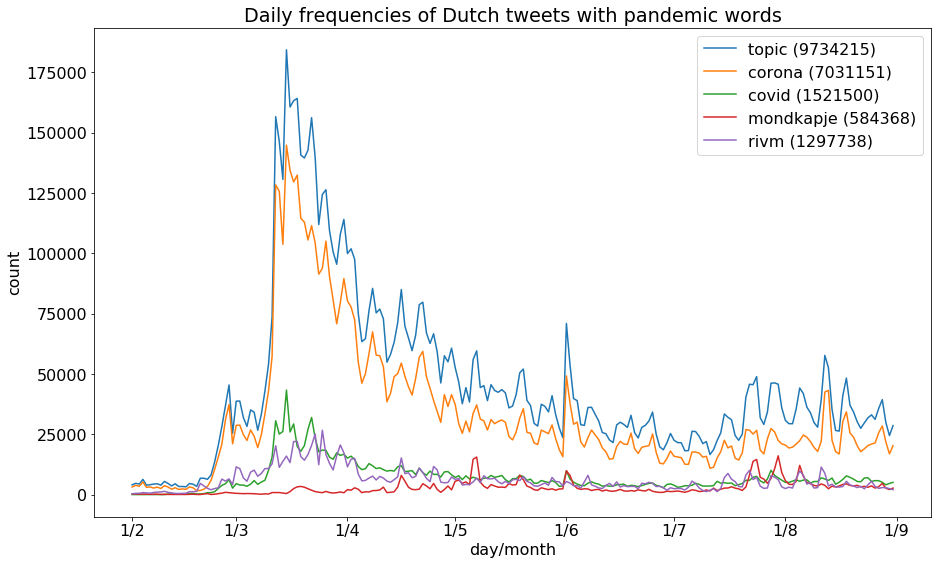

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
#%matplotlib inline

DATEFORMATPLOT = "%Y%m%d"
PLOTFILEOUT = "tweet-frequencies.png"

def getWeekendDates(dateStrings):
    weekendDates = []
    for ds in dateStrings:
        d = datetime.strptime(str(ds),DATEFORMATPLOT)
        if d == 0 or d == 6: weekendDates.append(d)
            
def stringArrayToDates(stringList,dateFormat=DATEFORMATPLOT):
    return([datetime.strptime(str(date),dateFormat) for date in stringList])

def makeLabel(name,myDict):
    return(name+" ("+str(sum(myDict.values()))+")")

weakendDates = getWeekendDates(rivm.keys())
font = {"size":16}
matplotlib.rc("font",**font)
plt.figure(figsize=(15,9))
ax1 = plt.subplot(111)
ax1.plot_date(stringArrayToDates(topic.keys()),list(topic.values()),xdate=True,fmt="-",label=makeLabel("topic",topic))
ax1.plot_date(stringArrayToDates(corona.keys()),list(corona.values()),xdate=True,fmt="-",label=makeLabel("corona",corona))
ax1.plot_date(stringArrayToDates(covid.keys()),list(covid.values()),xdate=True,fmt="-",label=makeLabel("covid",covid))
ax1.plot_date(stringArrayToDates(mondkapje.keys()),list(mondkapje.values()),xdate=True,fmt="-",label=makeLabel("mondkapje",mondkapje))
ax1.plot_date(stringArrayToDates(rivm.keys()),list(rivm.values()),xdate=True,fmt="-",label=makeLabel("rivm",rivm))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%-d/%-m"))
dummy = ax1.legend()
plt.title("Daily frequencies of Dutch tweets with pandemic words")
plt.xlabel("day/month")
plt.ylabel("count")
plt.savefig(PLOTFILEOUT)
plt.show()

### Plot normalized values

In [14]:
import pandas as pd

def normalize(dateCounts,countsIn):
    countsOut = {}
    for key in countsIn:
        if int(key) in dateCounts.index: 
            countsOut[key] = countsIn[key]/dateCounts.loc[int(key)]["count"]
    return(countsOut)

dateCounts = pd.read_csv(DATADIR+"../date-counts.csv",index_col=["date"])

In [15]:
rivmNorm = normalize(dateCounts,rivm)
coronaNorm = normalize(dateCounts,corona)
covidNorm = normalize(dateCounts,covid)
mondkapjeNorm = normalize(dateCounts,mondkapje)
topicNorm = normalize(dateCounts,topic)

rivmNorm7 = {list(rivmNorm.keys())[i]:summarize(rivmNorm,i,WEEKLENGTH) for i in range(0,len(rivmNorm))}
coronaNorm7 = {list(coronaNorm.keys())[i]:summarize(coronaNorm,i,WEEKLENGTH) for i in range(0,len(coronaNorm))}
covidNorm7 = {list(covidNorm.keys())[i]:summarize(covidNorm,i,WEEKLENGTH) for i in range(0,len(covidNorm))}
mondkapjeNorm7 = {list(mondkapjeNorm.keys())[i]:summarize(mondkapjeNorm,i,WEEKLENGTH) for i in range(0,len(mondkapjeNorm))}
topicNorm7 = {list(topicNorm.keys())[i]:summarize(topicNorm,i,WEEKLENGTH) for i in range(0,len(topicNorm))}

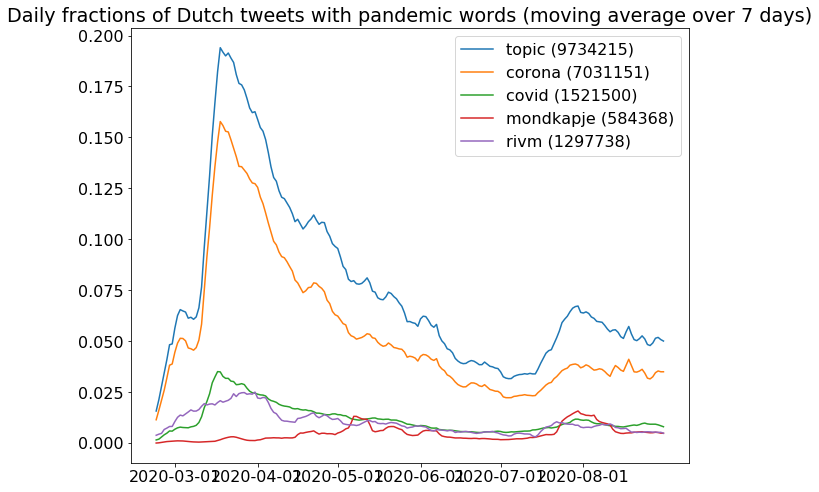

In [16]:
plt.figure(figsize=(10,8))
ax2 = plt.subplot(111)
ax2.plot_date(stringArrayToDates(topicNorm7.keys()),list(topicNorm7.values()),xdate=True,fmt="-",label=makeLabel("topic",topic))
ax2.plot_date(stringArrayToDates(coronaNorm7.keys()),list(coronaNorm7.values()),xdate=True,fmt="-",label=makeLabel("corona",corona))
ax2.plot_date(stringArrayToDates(covidNorm7.keys()),list(covidNorm7.values()),xdate=True,fmt="-",label=makeLabel("covid",covid))
ax2.plot_date(stringArrayToDates(mondkapjeNorm7.keys()),list(mondkapjeNorm7.values()),xdate=True,fmt="-",label=makeLabel("mondkapje",mondkapje))
ax2.plot_date(stringArrayToDates(rivmNorm7.keys()),list(rivmNorm7.values()),xdate=True,fmt="-",label=makeLabel("rivm",rivm))
plt.title("Daily fractions of Dutch tweets with pandemic words (moving average over 7 days)")
plt.xticks([datetime.strptime(d,DATEFORMATPLOT) for d in "20200301 20200401 20200501 20200601 20200701 20200801".split()])
dummy = ax2.legend()

## Content analysis

In [ ]:
import gzip
import json
import os
import numpy as np
import pandas as pd
import re

DATADIR = "../data/all/"
ID = "id_str"
LANG = "lang"
USER = "user"
SCREENNAME = "screen_name"
RIVM = "rivm"
DUTCH = "nl"
TARGETDATES = ["20200412","20200413","20200414","20200415","20200416","20200417","20200418"]
QUERY = "mondkapje"

def removeNewlines(text):
    return(re.sub(r"\n"," ",text))

fileNames = os.listdir(DATADIR)
texts = {}
dates = {}
for inFileName in fileNames:
    inFileDate = inFileName[0:8]
    if inFileDate in TARGETDATES:
        inFile = gzip.open(DATADIR+inFileName,mode="rt")
        for line in inFile:
            jsonData = json.loads(line)
            tweetText = removeNewlines(getTweetText(jsonData))
            tweetLang = jsonData[LANG]
            tweetId = jsonData[ID]
            tweetUser = jsonData[USER][SCREENNAME]
            if tweetLang == DUTCH and \
               re.search(QUERY,tweetText,flags=re.IGNORECASE) and \
               re.search(RIVM,tweetText,flags=re.IGNORECASE):
                texts[tweetId] = {"user":tweetUser,"text":tweetText}
                dates[tweetId] = int(inFileDate)
        inFile.close()
len(texts)

In [ ]:
pd.DataFrame.from_dict(texts,orient="index").to_csv("mondkapje-tweets.csv",header=False)

In [ ]:
ANNOTATIONFILE = "mondkapje-tweets.csv.human-labels.txt"

inFile = open(DATADIR+"../"+ANNOTATIONFILE,"r")
annotations = {}
minutes = {}
for line in inFile:
    (userName,date,tweetId,nbr,label) = line.strip().split()
    annotations[tweetId] = label
    minutes[date[0:12]] = True
inFile.close()

print("annotation time: {0:d} minutes ({1:0.1f} tweets per minute)".\
      format(len(minutes),round(len(annotations)/len(minutes),1)))

In [ ]:
IRRELEVANT = "IRRELEVANT"
NEUTRAL = "NEUTRAL"
NEGATIVE = "NEGATIVE"
POSITIVE = "POSITIVE"

labelsPerDate = {}
totals = {}
for tweetId in dates:
    if tweetId in annotations and annotations[tweetId] != IRRELEVANT:
        date = int(dates[tweetId])
        label = annotations[tweetId]
        if not date in labelsPerDate: labelsPerDate[date] = {}
        labelsPerDate[date][label] = labelsPerDate[date][label]+1 if label in labelsPerDate[date] else 1
        totals[label] = totals[label]+1 if label in totals else 1
labelsPerDate

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

labels = {"NEGATIVE":"rejects","POSITIVE":"supports","NEUTRAL":"neutral"}
percentages = {key:round(100*totals[key]/sum(totals.values())) for key in totals}
font = {"size":16}
matplotlib.rc("font",**font)

for date in labelsPerDate:
    for label in [NEGATIVE,NEUTRAL,POSITIVE]:
        if not label in labelsPerDate[date]:
            labelsPerDate[date][label] = 0

negative = [labelsPerDate[date][NEGATIVE] for date in labelsPerDate.keys()]
neutral = [labelsPerDate[date][NEUTRAL] for date in labelsPerDate.keys()]
positive = [labelsPerDate[date][POSITIVE] for date in labelsPerDate.keys()]
negplusneu = [negative[i]+neutral[i] for i in range(0,len(neutral))]
plt.figure(figsize=(12,8))
plt.bar(list(labelsPerDate.keys()),positive,label=labels[POSITIVE]+" ("+str(percentages[POSITIVE])+"%)",bottom=negplusneu)
plt.bar(list(labelsPerDate.keys()),neutral,label=labels[NEUTRAL]+" ("+str(percentages[NEUTRAL])+"%)",bottom=negative)
plt.bar(list(labelsPerDate.keys()),negative,label=labels[NEGATIVE]+" ("+str(percentages[NEGATIVE])+"%)",color="r")
plt.title("Twitter stance on RIVM advising against facemask use by general public")
plt.xticks(list(labelsPerDate.keys()),["Fri 17/4","Wed 15/4","Sun 12/4","Thu 16/4","Mon 13/4","Tue 14/4"])
plt.legend()
plt.show()

## twiqs.nl tweets per month (alltime)

In [ ]:
from datetime import datetime
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
DATAFILE = "months.txt"
DATEFORMAT = "%Y%m"

In [ ]:
df = pd.read_csv(DATAFILE,sep=" ",header=None,index_col=0)

In [ ]:
font = {"size":14}
matplotlib.rc("font",**font)
plt.figure(figsize=(12,8))
ax2 = plt.subplot(111)
ax2.set_ylim([0,90000000])
ax2.plot_date([datetime.strptime(str(month),DATEFORMAT) for month in df.index if month > 201100],\
               [df.loc[month][1] for month in df.index if month > 201100],fmt="-")
plt.title("number of Dutch tweets collected by twiqs.nl per month")